# Repaso

# Dimensionalidad

# Aprendize No Supervisado

Corresponde a la ausencia de informacion sobre el vector objetivo. Lo que se quiere hacer es agrupar
o tratar las variables de X.

Usualmente lo que se hace es agrupar datos (clustering) o reducir la dimension (cantidad de 
variables)

# La maldicion de la dimensionalidad

Cuando se va aumentando la cantidad de variables/dimensiones/columnas/X dentro de un modelo, 
entonces la distancia entre puntos va aumentando!

- Si tengo una linea recta (dimension 2), entonces las distancias estan acotadas a dos dimensiones.
Debido a esto, las distancias son pequenas
- Ahora, si aumento la dimensionalidad a 10, las distancias aumentaran, ya que tenemos mas opciones
para hacerlo.

Este problema hace que los modelos NO convergan correctamente cuando hay muchas dimensiones o
variables

# Psicometria

# Analisis Factorial - No se ocupa tanto

Permite resumir la informacion o variables en un grupo mas pequeno! Por ejemplo: Pasar de 100 
variables a 2 variables. Se hace un ponderado de las 100 variables para resumir en 2 variables.

Claramente se pierde informacion!

Una forma alocada es sumar todas las variables!

## Analisis factorial

X1 = n + m1x1 + m2x2 + m3x3 ... + e1

Al final es hacer combinaciones lineales de todos, y simplemente ocultar algunos segun las cargas/contribuciones/coeficientes/pendientes de cada variable.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import lec7_graphs as gfx

In [15]:
df = pd.read_csv('cep45.csv')
trust_df = df.filter(regex='p17 *')

In [16]:
trust_df

,p17_a,p17_b,p17_c,p17_d,p17_e,p17_f,p17_g,p17_h,p17_i,p17_j,p17_k,p17_l,p17_m,p17_n
0,2,4,3,2,3,3,3,4,3,3,2,3,2,2
1,2,3,3,3,3,3,2,2,3,4,3,3,3,3
2,4,4,4,4,3,3,4,4,4,4,4,3,4,2
3,1,3,2,2,3,2,3,3,3,4,3,3,3,3
4,3,3,2,1,2,2,1,1,2,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,4,4,4,4,4,4,4,4,4,4,4,4,3,4
1499,9,9,3,3,3,2,3,2,2,3,3,2,3,3
1500,1,9,3,3,3,3,3,2,3,3,3,3,2,3
1501,3,3,3,3,3,3,3,3,2,3,4,3,3,2


In [17]:
# Aqui en la clase un analisis exploratorio sencillo, para ver que onda

# Prueba de esferacidad de Bartlett

Tenemos una  matriz de correlaciones! df.corr()

Si tenemos dos variables:

||var1|var2|
|-|----|----|
var1|1|0.8|
var2|0.8|1|

La diagonal esta correlacionada

## Matriz de identidad

Es cuando las variables NO tienen ninguna relacion para nada. O sea, seria:


||var1|var2|
|-|----|----|
var1|1|0|
var2|0|1|

En la prueba, lo primero que se quiere ver es si se rechaza la hipotesis nula:

Hipotesis nula: La matriz de correlaciones es una matriz de identidad
Hipotesis alternativa: La matriz de correlaciones NO es una matriz de identidad (Al menos una o 
mas variables tienen relacion entre si).

Si las variables tienen alguna relacion, entonces pueden ser resumidas y se disminuye la
dimensionalidad


In [18]:
import factor_analyzer as fact

In [19]:
fact.calculate_bartlett_sphericity(matriz)

NameError: name 'matriz' is not defined

# Prueba Kaiser-Meyer-Olkin

NO es un test de hipotesis.

Pregunta: Son las correlaciones parciales entre dos items cercanas a 0?

KMO = Si el valor es mayor a 0.7, entonces estan relacionadas. Si es menor o igual a 0.7, entonces
NO estan relacionadas y las variables se pueden sacar.


# Definiendo cantidad de factores

Cuantos factores necesitamos? Al final seleccionamos los coeficientes/factores que sean mayores a 1,
lo que significa que una o mas variables se pueden compactar|

Al final se permite ver la cantidad de factores/disminuciones que se generan y los valores que tienen.
Aqui esta el criterio del codo. Se selecciona el coeficiente que tenga la menor cantidad de
factores latentes/variables, y con la mayor pendiente mayor a 1!

# Interpretacion de factores

Nos fijamos en la magnitud (valor del coeficiente) y la direccion (el signo del coeficiente) de las cargas



In [ ]:
factorize_dos = fact.FactorAnalyzer(n_factors=2, rotation='varimax')
factorize_dos?

Type:        FactorAnalyzer
String form: FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})
File:        c:\users\javier\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py
Docstring:  
A FactorAnalyzer class, which -
    (1) Fits a factor analysis model using minres, maximum likelihood,
        or principal factor extraction and returns the loading matrix
    (2) Optionally performs a rotation, with method including:

        (a) varimax (orthogonal rotation)
        (b) promax (oblique rotation)
        (c) oblimin (oblique rotation)
        (d) oblimax (orthogonal rotation)
        (e) quartimin (oblique rotation)
        (f) quartimax (orthogonal rotation)
        (g) equamax (orthogonal rotation)

Parameters
----------
n_factors : int, optional
    The number of factors to select.
    Defaults to 3.
rotation : str, optional
    The type of rotation to perform after
    fitting the factor analysis model.
    If set to None, no rotation will be performed,

Al final, luego de ver todos los factores, se puede ver el desglose de cada uno y cuanto explica a
cada una de las variables que engloba.

Luego, solamente se dejan las variables que tengan una explicacion de por lo menos 0.4 (mayor o
igual a 0.4)

# Analisis de PCA (Principal Component Analysis)

- Es un metodo que permite mapear datos a otro sistema de coordenadas. Esta transformacion se hace
a traves de una transformacion lineal

$Xtransformado = P*X$

Al final, encuentra una recta que pase por la mayor cantidad de datos. Luego, se obtiene la perpendicular de esa recta. Finalmente, se obtiene la proyeccion de n - 1 dimensionalidad a la nueva recta, bajando 1 dimension en cada paso.

Permite compactar variables no relacionadas


In [ ]:
from sklearn.datasets import load_digits
df = load_digits()

In [ ]:
df.data[8]

array([ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
       12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
        3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
        0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
        3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(df.data
)


Ta super rara la clase wn, no entendi casi nada.

# K Means

Agrupa datos segun un centroide. Clasifica los datos segun la proximidad al centroide.

# Repaso clases

## Problema de la dimensionalidad

Hace referencia al fenomeno donde nuestros modelos empeoran al utilizar demasiada variables. Hay
3 formas en que los modelos empeoran:

- Computacionalmente se hace muy costoso
- Cuesta mucho que convergan los resultados (por ende, el modelo es inestable)
- Ademas, las aproximaciones van aumentando de valor

Debido a esto, se hace imperante disminuir la cantidad de variables que tiene un modelo.

# Analisis Factorial

Es una metodo para reducir la dimensionalidad de un set de datos. Si se tienen muchas variables, estan se pueden reducir si es que estan correlacionadas.

Se basa en la correlacion entre variables. Las variables mas correlacionadas entre si son agrupadas en un unico grupo, reduciendo la dimensionalidad.

La correlacion dentro de un mismo grupo debe ser alta, mientras que entre grupos debe ser baja.

# Que es un factor?

Un factor es una **variable ESCONDIDA** que afecta a un grupo de variables relacionadas. Este factor es la razon del por que estas variables estan correlacionadas. Los factores son imposibles de medir.

Por ejemplo: Queremos saber si hay tipos de personalidades que se agrupan entre si. Ademas, queremos saber si es que hay caracteristicas comunes que agrupan a estos tipos de personalidades.

|Tipo Personalidad|Caracteristica que la agrupa|
|-----------------|----------------------------|
Extrovertido
Sociable

## Dimensionalidad desde la Psicometria

Objetivo: Disminuir la cantidad de variables.

Las variables se condensan en una o mas variables. Esto se hace a traves de una combinacion lineal
de factores

$X1 = n + m1x1 + m2x2 + m3x3$

# Pasos de implementacion

## Datos a utilizar

Corresponder a los datos de una encuesta en cuanto a la confianza que se tiene de diversos entes
publicos. La escala va de 1 a 4, y 8 o 9 corresponden a notas faltantes/na.

1. Definimos una bateria de preguntas
   1. Los datos son heterogeneos? Si lo son, estandarizarlo
2. Eliminamos/imputamos valores perdidos
3. Generamos metricas de validacion
4. Evaluamos la cantidad de factores
5. Inferimos caracteristicas de los factores

Se utiliza FactorAnalyzer

# Analisis exploratorio

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [22]:
import factor_analyzer as factor
import missingno as magn

df = pd.read_csv('cep45.csv')

In [23]:
df.columns

# Las columnas que empiezan con p17_ son las de las instituciones

Index(['corr', 'filtro', 'psu', 'region', 'p1_1', 'p1_2', 'p1_3', 'p2', 'p3',
       'p4',
       ...
       'de14_b', 'de14_c', 'de14_d', 'de14_e', 'de14_f', 'de15', 'de16',
       'de17', 'b5', 'pond'],
      dtype='object', length=188)

In [24]:
trust_df = df.filter(regex='p17_*')

In [25]:
trust_df.sample()
# 4 = Mucha desconfianza
# 1 = Nada de desconfianza

,p17_a,p17_b,p17_c,p17_d,p17_e,p17_f,p17_g,p17_h,p17_i,p17_j,p17_k,p17_l,p17_m,p17_n
1157,4,4,3,3,2,3,2,2,3,3,3,3,2,2


In [26]:
# esta funcion permite ver la cantidad de valores na en una columna
def fetch_missing(df, missing_vals=[8, 9]):
    for colname, serie in df.iteritems():
        print(colname, serie.isin(missing_vals).value_counts('%')[1].round(2))

In [27]:
fetch_missing(trust_df)

p17_a 0.03
p17_b 0.07
p17_c 0.04
p17_d 0.04
p17_e 0.03
p17_f 0.02
p17_g 0.09
p17_h 0.02
p17_i 0.03
p17_j 0.03
p17_k 0.05
p17_l 0.04
p17_m 0.07
p17_n 0.03


<AxesSubplot:>

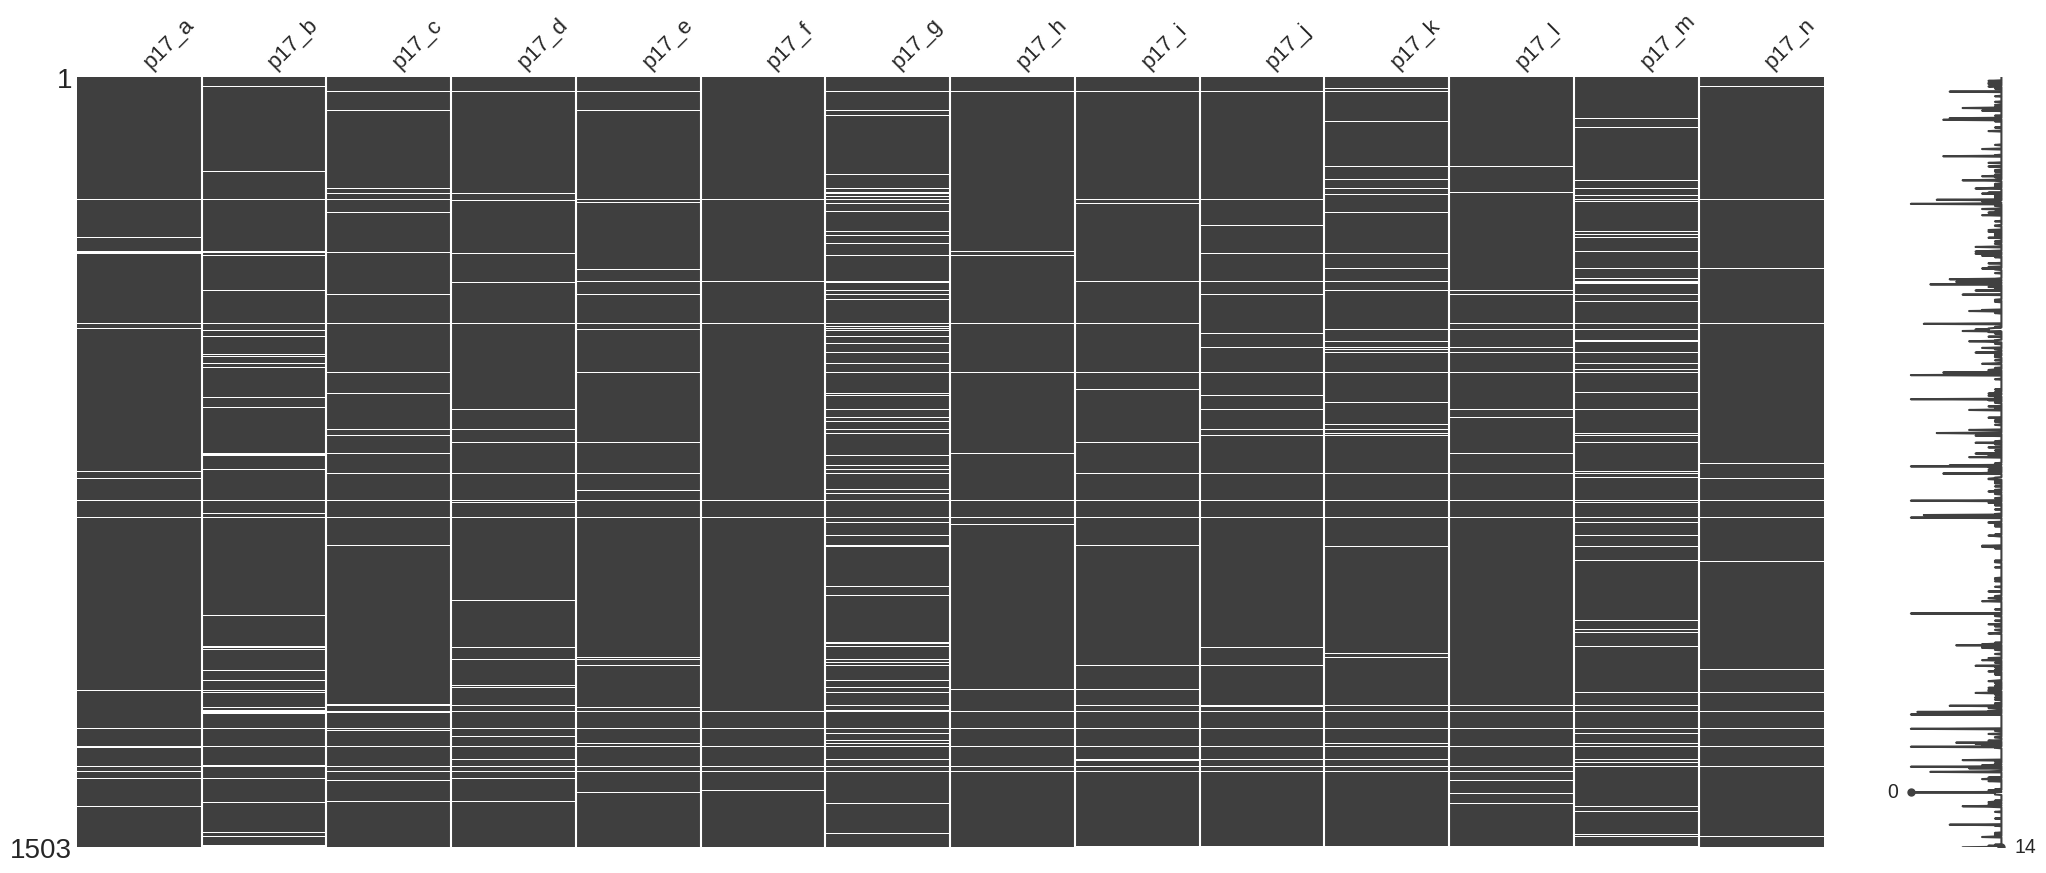

In [28]:
# Tambien se puede ver con la libreria missingo

magn.matrix(trust_df.replace([8, 9], [np.nan, np.nan]))

# De aqui, graficamente se puede ver que p17_g tiene la mayor cantidad de valores nulos

In [29]:
# Ahora, veremos las medias de cada uno de las columnas
variable, mean = [], []

for colname, serie in trust_df.iteritems():
    variable.append(colname)
    mean.append(serie.mean())

tmp_df = pd.DataFrame({'var': variable, 'mean': mean}).sort_values(by='mean')

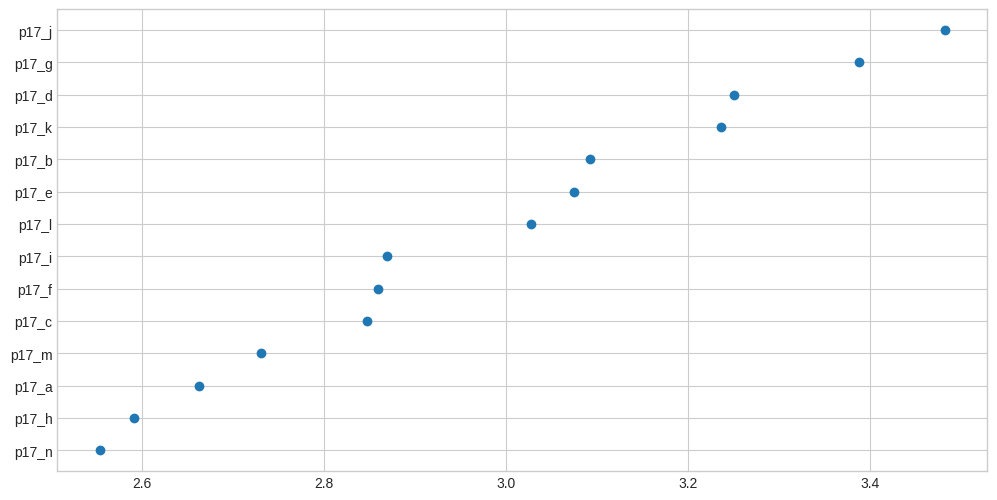

In [30]:
plt.plot(tmp_df['mean'], tmp_df['var'], 'o')

# Con el replace, se puede ver que los partidos politicos y sindicatos son los que generan mas
# desconfianza

# Extraccion de Valores

Inicialmente es innecesario indicar cuantos factores queremos extraer con FactorAnalyzer. Por default obtiene 3.

- Aqui se utiliza varimax como rotacion. Esto significa que hara una linea recta que fitee a las diversas variables, y maximizara la varianza de cada una de las variables. Creo que es muy similar al PCA, al final maximiza la distancia entre la proyeccion de los puntos a la recta y el centro???.

# 1. Instanciar nuestro Analizador de factores

- Sin necesidad de poner cuantos factores

In [32]:
factorize = factor.FactorAnalyzer(rotation='varimax')

# 2. Pasar los datos a un fit

In [33]:
factorize.fit(trust_df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

3. Obtener los eigenvalues con .get_eigenvalues()

Recordar que los eigenvalues se obtienen de la siguiente manera:
- Generar una linea recta
- Proyectar los puntos o datos a la linea recta (trazar las distancias)
- Calcular la distancia del punto al centro de la recta
- Obtener la suma de los cuadrados de las distancias de cada punto
- Este es el eigenvalue de la recta

Para obtener la varianza alrededor de la recta (Cuanto esta explicando cada factor), se utiliza la siguiente formula:

$\frac{SumaCuadradosDistanciaDelFactor}{n-1} = Variacion explicada por el factor$

Al final, siempre se generan todos los posibles factores que se pueden representar (que es igual a la cantidad de variables que tienen nuestros datos). Ahora, cada factor (o componente principal por lo que estoy cachando) explica una cantidad de la varianza total de los datos (La distancia de los puntos al centro del componente). Debido a lo anterior, 

In [36]:
factorize.get_eigenvalues()

# Aqui se extraen la mayor cantidad de factores latentes que se pueden
# obtener (la misma cantidad de columnas que los datos)

# Estos son valores propios

(array([5.49842419, 1.14587292, 0.89926341, 0.85550809, 0.72165128,
        0.69572011, 0.63389523, 0.62396403, 0.60609083, 0.57058745,
        0.49919319, 0.46208615, 0.40448333, 0.38325979]),
 array([ 4.95224693,  0.64086626,  0.34932044,  0.12526742,  0.1157515 ,
         0.08296153,  0.06490486,  0.01623975,  0.00572857, -0.04603453,
        -0.05980125, -0.07163102, -0.10448114, -0.12890717]))

In [ ]:
# Factor propio = Pendiente